In [12]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
import os
import subprocess
from sklearn.ensemble import AdaBoostClassifier
from time import time
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import numpy as np

filename = 'df_imputed_tot_OHE.pkl'
df = pd.read_pickle(filename)
X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])
train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.33,shuffle = True, random_state=45)
pprint('--Data splitted done')

'--Data splitted done'


In [13]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [14]:
def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=100):
    """Run a random search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search, n_jobs= -1)

    start = time()
    random_search.fit(X, y)
    print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

    top_params = report(random_search.grid_scores_, 3)
    return  top_params

In [15]:
pprint('-- Model Linear_SVM')
model_Linear_SVM=svm.SVC(kernel='linear',C=0.1,gamma=0.1,probability=True )
#model_Linear_SVM.fit(train_X,train_Y)
pprint('-- Model RBF SVM')
model_RBF_SVM=svm.SVC(kernel='rbf',C=1e4,gamma=1e-4, probability=True)
#model_RBF_SVM.fit(train_X,train_Y)
pprint('-- Model Logistic Regression')
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 0.01)
#model_Logistic_Regression.fit(train_X,train_Y)
pprint('-- Model Decision Tree')
model_Decision_Tree=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
#model_Decision_Tree.fit(train_X,train_Y)
pprint('-- Model K-NN')
model_KNN = KNeighborsClassifier(n_neighbors=65)
pprint('-- Model Random Forest')
rfc_best = RandomForestClassifier(n_estimators= 400,
               max_features= 'sqrt',
               max_depth= 30,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)

pprint('--------FINISH MODELS CREATED')

'-- Model Linear_SVM'
'-- Model RBF SVM'
'-- Model Logistic Regression'
'-- Model Decision Tree'
'-- Model K-NN'
'-- Model Random Forest'
'--------FINISH MODELS CREATED'


In [21]:
# dict of parameter list/distributions to sample
n_estimators_search=list(range(100,1100,100))
range_learning_rate = np.logspace(-5, 2, 8)

param_dist = {"n_estimators": n_estimators_search,
             'learning_rate': range_learning_rate}

pprint('----Random Search Decision Tree\n')
AdaBoost_DT = AdaBoostClassifier(base_estimator=model_Decision_Tree, random_state = 34)
DT_rs = run_randomsearch(X, y, AdaBoost_DT, param_dist, cv=10,
                         n_iter_search=10)


'''
pprint('----Random Search SVM_Linear\n')
AdaBoost_SVM_Linear = AdaBoostClassifier(base_estimator=model_Linear_SVM,algorithm = 'SAMME', random_state = 36)
SVM_Linear_rs = run_randomsearch(X, y, AdaBoost_SVM_Linear, param_dist, cv=10,
                         n_iter_search=10)
'''

'''
pprint('----Random Search SVM_RBF\n')
AdaBoost_SVM_RBF = AdaBoostClassifier(base_estimator=model_RBF_SVM,algorithm = 'SAMME', random_state = 37)
SVM_RBF_rs = run_randomsearch(X, y, AdaBoost_SVM_RBF, param_dist, cv=10,
                         n_iter_search=10)
'''

pprint('----Random Search Logistic_Regression\n')
AdaBoost_Logistic_Regression = AdaBoostClassifier(base_estimator=model_Logistic_Regression, random_state = 38)
Logistic_Regression_rs = run_randomsearch(X, y, AdaBoost_Logistic_Regression, param_dist, cv=10,
                         n_iter_search=10)



'''
pprint('----Random Search K = 65 - NN\n')
AdaBoost_model_KNN= AdaBoostClassifier(base_estimator=model_KNN, random_state = 38)
model_KNN_rs = run_randomsearch(X, y, AdaBoost_model_KNN, param_dist, cv=10,
                         n_iter_search=10)

'''



'----Random Search Decision Tree\n'

RandomizedSearchCV took 13.83 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.758 (std: 0.034)
Parameters: {'n_estimators': 200, 'learning_rate': 0.01}

Model with rank: 2
Mean validation score: 0.752 (std: 0.054)
Parameters: {'n_estimators': 800, 'learning_rate': 1e-05}

Model with rank: 3
Mean validation score: 0.752 (std: 0.054)
Parameters: {'n_estimators': 600, 'learning_rate': 1e-05}

'----Random Search Logistic_Regression\n'

RandomizedSearchCV took 14.12 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.774 (std: 0.026)
Parameters: {'n_estimators': 600, 'learning_rate': 10.0}

Model with rank: 2
Mean validation score: 0.765 (std: 0.030)
Parameters: {'n_estimators': 400, 'learning_rate': 100.0}

Model with rank: 3
Mean validation score: 0.764 (std: 0.044)
Parameters: {'n_estimators': 100, 'learning_rate': 0.1}



"\npprint('----Random Search K = 65 - NN\n')\nAdaBoost_model_KNN= AdaBoostClassifier(base_estimator=model_KNN, random_state = 38)\nmodel_KNN_rs = run_randomsearch(X, y, AdaBoost_model_KNN, param_dist, cv=10,\n                         n_iter_search=10)\n\n"

In [25]:
AdaBoost_DT_model = AdaBoostClassifier(base_estimator= model_Decision_Tree, n_estimators =  200, learning_rate = 0.01, random_state = 34)


AdaBoost_Logistic_Regression_model = AdaBoostClassifier(base_estimator=model_Logistic_Regression,  n_estimators =  600, learning_rate = 10, random_state = 38)



In [65]:






from sklearn.model_selection import KFold, StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts

classifiers=['Logistic Regression','Decision Tree']
models=[AdaBoost_Logistic_Regression_model, AdaBoost_DT_model]


fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []









for i in models:
    model = i
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)





Model: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=10, n_estimators=600, random_state=38)
Model: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=0.01, n_estimators=200, random_state=34)


,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
Logistic Regression,0.787966,0.059406,0.814492,0.007061
Decision Tree,0.772701,0.066150,0.859179,0.004475


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
Logistic Regression,0.807926,0.054140,0.833697,0.006229
Decision Tree,0.802149,0.052224,0.878320,0.003555


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
Logistic Regression,0.813008,0.064493,0.827086,0.007087
Decision Tree,0.782373,0.072114,0.841524,0.007256


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
Logistic Regression,0.809529,0.081168,0.840426,0.006014
Decision Tree,0.829137,0.065515,0.918577,0.006910


,Fit_time,Scoring Time
Logistic Regression,2.500943,0.387955
Decision Tree,0.804409,0.136793


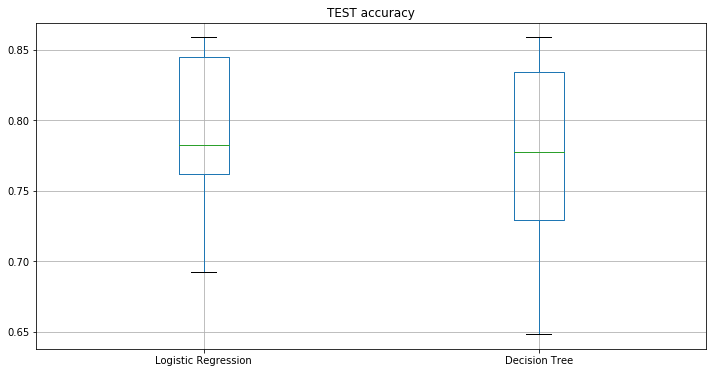

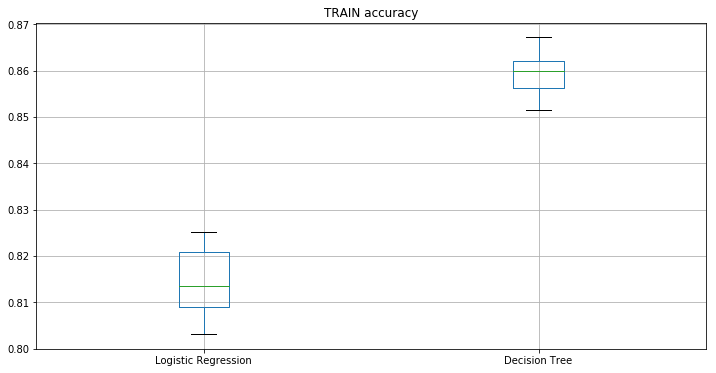

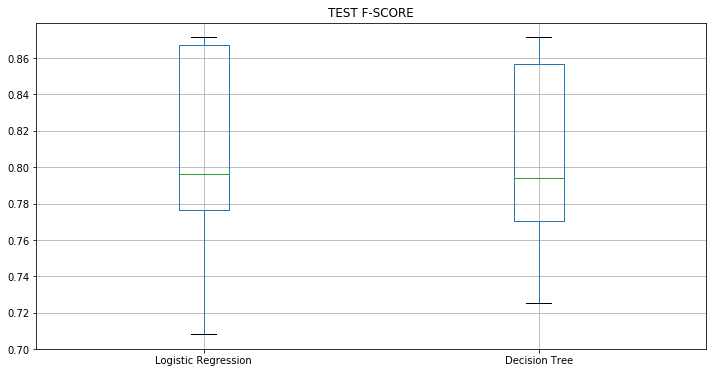

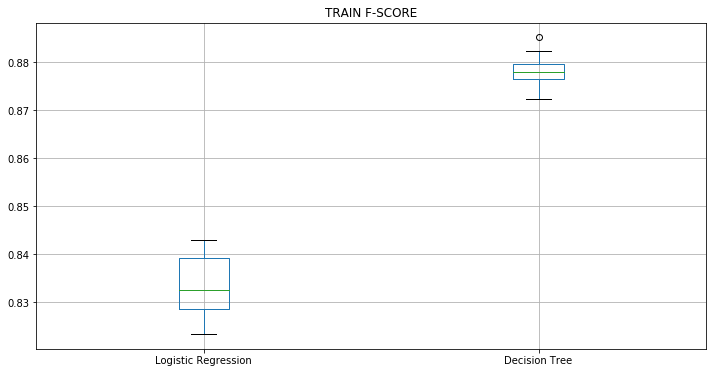

In [67]:
plt.figure(figsize=(12,6))
plt.title('TEST accuracy')
box_test_accuracy=pd.DataFrame(test_accuracy_total,index=[classifiers])
box_test_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN accuracy')
box_train_accuracy=pd.DataFrame(train_accuracy_total,index=[classifiers])
box_train_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TEST F-SCORE')
box_test_F_score=pd.DataFrame(test_F_score_total,index=[classifiers])
box_test_F_score.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN F-SCORE')
box_train_F_score=pd.DataFrame(train_F_score_total,index=[classifiers])
box_train_F_score.T.boxplot()
plt.show()




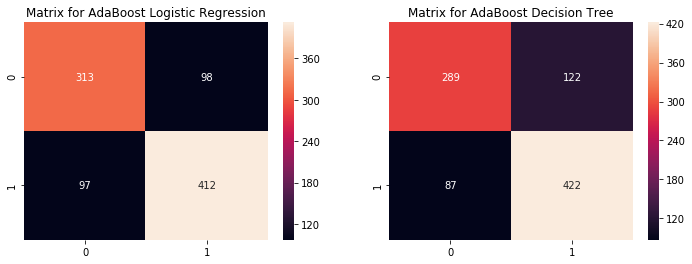

In [68]:
f,ax=plt.subplots(1,2,figsize=(12,4))
y_pred = cross_val_predict(AdaBoost_Logistic_Regression_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Matrix for AdaBoost Logistic Regression')
y_pred = cross_val_predict(AdaBoost_DT_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1],annot=True,fmt='2.0f')
ax[1].set_title('Matrix for AdaBoost Decision Tree')
plt.show()

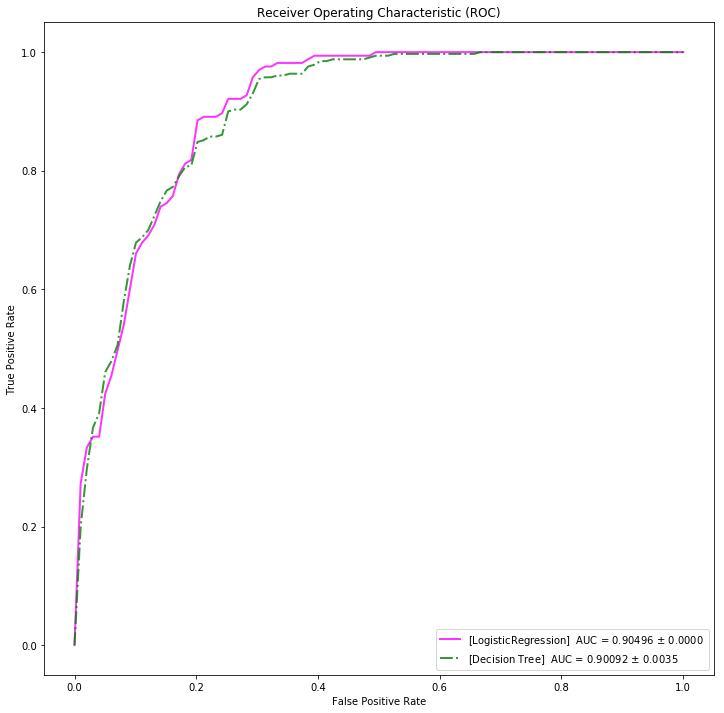

,AUC Mean,std
LogisticRegression,0.904959,1.110223e-16
Decision Tree,0.900918,3.531720e-03


In [70]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


models = [    
    {
        'label' : 'LogisticRegression',
        'model': AdaBoost_Logistic_Regression_model,
        'color': 'fuchsia',
        'linestyle': '-',
        'markers': ''
 
    },
    {
        'label' : 'Decision Tree',
        'model': AdaBoost_DT_model, 
        'color': 'green',
        'linestyle': '-.',
        'markers': ''
    },

]







# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []

mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
stds = []


   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for train, test in cv.split(X, y):
        probas_ = m['model'].fit(train_X, train_y).predict_proba(test_X)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    #plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)
    
   
    aucs_mean.append(mean_auc)
    stds.append(std_auc)
    labels.append(m['label']) 

    
   



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

plt.show()

AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':stds },index = labels)       
AUCs



